# Knock airport Weather
***
### Description


In [12]:
# Import libs
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Load data
file_path = 'hly4935.csv'
df = pd.read_csv(file_path)

#Show Data Import sample 
df.head()

C:\Users\Serhii\AppData\Local\Temp\ipykernel_19040\4149768939.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


In [14]:
# Show df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246930 entries, 0 to 246929
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    246930 non-null  object 
 1   ind     246930 non-null  int64  
 2   rain    246930 non-null  object 
 3   ind.1   246930 non-null  int64  
 4   temp    246930 non-null  float64
 5   ind.2   246930 non-null  int64  
 6   wetb    246930 non-null  float64
 7   dewpt   246930 non-null  float64
 8   vappr   246930 non-null  float64
 9   rhum    246930 non-null  int64  
 10  msl     246930 non-null  object 
 11  ind.3   246930 non-null  int64  
 12  wdsp    246930 non-null  object 
 13  ind.4   246930 non-null  int64  
 14  wddir   246930 non-null  object 
 15  ww      246930 non-null  object 
 16  w       246930 non-null  object 
 17  sun     246930 non-null  float64
 18  vis     246930 non-null  object 
 19  clht    246930 non-null  object 
 20  clamt   246930 non-null  object 
dtypes: float64

In [15]:
# Convert 'date' collumn to date-time format (according to the format)
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')

# Checked missed values
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

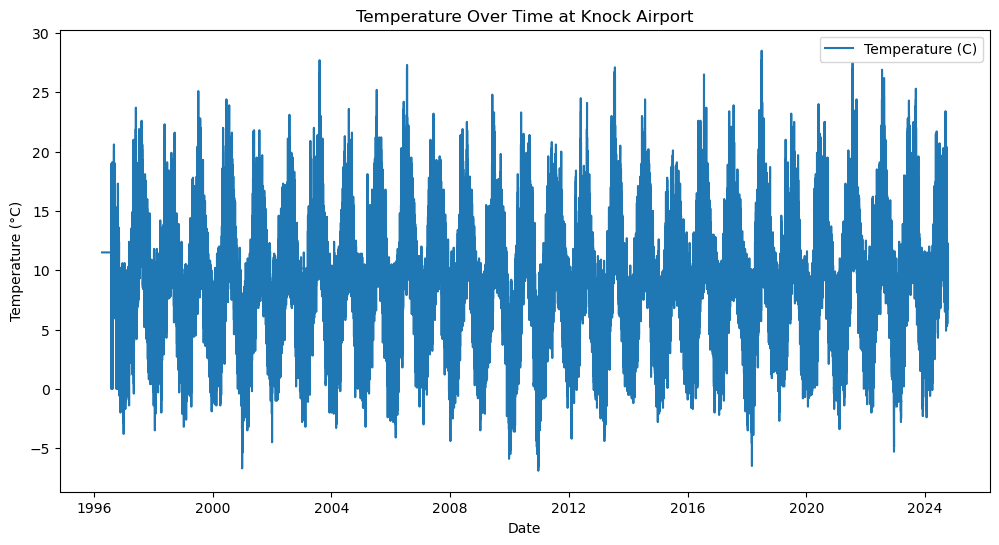

In [16]:
# Plot temperature graph for all dates
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp'], label='Temperature (C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time at Knock Airport')
plt.legend()

# Show
plt.show()

# End
***